Assignment 9 - KMeans Clustering


Tyler Gardner

11/15/2021

#Task 1

##Code Chunk 1 - Set up, Data import, and Preparation

In the first code chunk of this google colab notebook we start by importing the packages that are needed to run our code and analyze the data. The google drive is mounted to import and read the data. The data is then looked over and analyzed. *******The target variable is popped from the data set and encoded. The data set is then encoded as well so we can explore and analyze the data set.********

In [1]:
# A. Data Import

# Import Packages Needed
import pandas as pd
import numpy as np
import sklearn 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# mount the google drive location to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import data using pd.read_csv()
Wine_Quality_raw = pd.read_csv("/content/drive/MyDrive/data_sets/winequality.csv")
Wine_Quality = Wine_Quality_raw.copy()

In [4]:
# B. Show the overall structure and summary of the data frame using info(), describe(), head()

Wine_Quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
Wine_Quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
Wine_Quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# C. pop() the target variable into a new variable ie y_target
y_target = Wine_Quality.pop('quality')

In [8]:
# D. Show the overall structure and summary of the data frame using info(), describe(), head()
Wine_Quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [9]:
Wine_Quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [10]:
Wine_Quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


E. In a text block explain why you do, or do not need to dummy encode the dataset

You DO NOT need to dummy encode the dataset because dummy encoding is necessary when you have categorical columns in your dataset. In this situation we do not have categorical columns in our data so therefore it is not necessary to dummy encode the dataset.

# Task 2

## Code Chunk 2 - Standardizing the Data

In code chunk 2 we use the standard scaler fit to standardize and transofrm the data. After this is done a scaled dataframe is shown.

In [11]:
# 1. Using the StandardScaler fit and transform the data
Wine_Quality_Scaled = StandardScaler().fit_transform(Wine_Quality)
Wine_Quality_Scaled = pd.DataFrame(Wine_Quality_Scaled, columns= ['fixed acidity', 
                                                                  'volatile acidity', 
                                                                  'citric acid', 
                                                                  'residual sugar', 
                                                                  'chlorides',
                                                                  'free sulfur dioxide',
                                                                  'total sulfur dioxide',
                                                                  'density',
                                                                  'pH',
                                                                  'sulphates',
                                                                  'alcohol'])

In [12]:
# 2. Show the scaled dataframe
Wine_Quality_Scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


# Task 3

## Code Chunk 3 - Clusters using Elbow Method

In Code chunk 3 we use the elbow method to determine the optimal number of clusters. We then run a for loop to create a list with the inertia results for the 20 cluster combinations. The code then plots the list of sum of squared distances from each sample to their respective cluster centers. Finally, a text block is used to explain the best number of clusters based on the elbow method. 

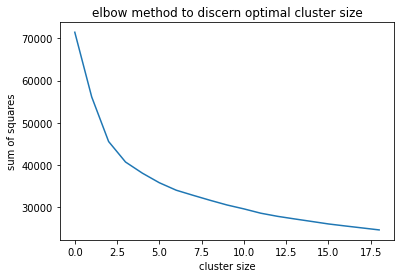

In [13]:
# 1. Use the elbow method to determine the optimal number of clusters. (use clusters 1 through 20)
# 2. Run a for loop to create a list with the inertia results for the 20 cluster combinations (see tutorial code)
# 3. Plot the list of sum of squared distances from each sample to their respective cluster centers. 
inertia_lst = []
model_lst = []

for i in range(1,20):
  model = KMeans(i).fit(Wine_Quality_Scaled)
  inertia_lst.append(model.inertia_)
  model_lst.append(model)


plt.plot(inertia_lst)
plt.title('elbow method to discern optimal cluster size')
plt.xlabel('cluster size')
plt.ylabel('sum of squares')

plt.show()

4 - In a text block explain the best number of clusters based on the elbow method. If it's unclear which cluster is best make your best argument why you chose the number you chose. 

I personally found it hard to really decide where the 'defined point' on this plot is but from looking at it I would say the best number of clusters based on the elbow method it would be somewhere between 7 and 8. The reason I say that is because if you were to go from 13 to 14 it is barely reducing the sum of squares. So definitely somehwere between 7 and 10 is optimal but for this instance i'm going to say that 8 is the best number of clusters.

# Task 4

## Code Chunk 4 - Kmeans

In code chunk 4 we fit and predict a KMeans cluster object to the data based on the best cluster option shown in Task 3 which would be 2.5 clusters. The results are then put into the existing dataframe in a new column called 'prdicted_cluster'

In [14]:
# 1. Fit and predict with a KMeans cluster object to your data using the best cluster option shown in Task 3
kmeans_8 = KMeans(8).fit(Wine_Quality_Scaled)

In [15]:
# 2. Put the results (predicted clusters) into your existing dataframe in a new column called 'predicted_cluster'
predicted_cluster = kmeans_8.predict(Wine_Quality_Scaled)
Wine_Quality_Scaled['predicted_cluster'] = predicted_cluster

In [16]:
Wine_Quality_Scaled.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_cluster
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,2
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,2
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,3
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2
5,0.142473,1.945855,-2.192833,-0.765798,0.541412,-0.987451,-1.340197,1.034993,1.813090,0.193097,-0.915464,2
6,0.528176,1.581387,-1.779913,-0.807837,0.370134,-0.874763,-1.004018,0.568084,0.506915,-0.478971,-0.915464,2
7,0.065333,1.885110,-2.192833,-0.891916,0.255949,-0.874763,-1.676376,-0.032228,1.066704,-0.411765,-0.412370,2


# Task 5

## Code Chunk 5 - Scatterplot

In code chunk 5 the code that is run creates two scatter plots with two different variables with highlights of the points based on the 'predicted_cluster' column. After outputting these two graphs a text box is used to analyze the results.

### Graph 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


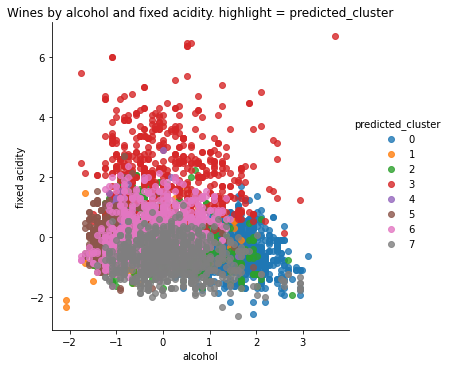

In [17]:
# 1-2. By using a scatter plot, choose two columns (your choice as to which two) and highlight the points using the predicted_clusters column
# Add a title, and axis labels to your plot to describe the plot
sns.lmplot('alcohol', 'fixed acidity', data=Wine_Quality_Scaled, hue='predicted_cluster', fit_reg=False)
plt.title("Wines by alcohol and fixed acidity. highlight = predicted_cluster")
plt.show()

### Graph 2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


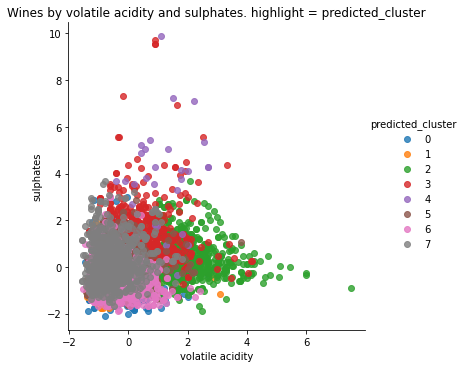

In [18]:
# Graph 2
sns.lmplot('volatile acidity', 'sulphates', data=Wine_Quality_Scaled, hue='predicted_cluster', fit_reg=False)
plt.title("Wines by volatile acidity and sulphates. highlight = predicted_cluster")
plt.show()

3 - In a text box below describe how well separated the clusters are by these two variables. Is there a lot of overlap or are there clear clusters and good separation between clusters? Do any particular clusters stand out as particularly unique in the boxplot?


In graph 1 there is still quite a bit of overlap but you can see some good separation in the clusters if you look at 2, 5, and 7. Those three make a triangle with where their clusters are predominatly. The other clusters are mixed in and not really separated and overlap. Cluster 7 in graph one stands out the most, it seems the most tight cluster of them all in graph one comparing alcohol and fixed acidity.

In graph 2 I would say it has a much worse overlap than graph one had. Everything seems to be on top of one another as a big blob/cluster. No particular clusters really stand out in graph 2.

# Task 6

## Code Chunk 6 - Boxplot

In code chunk 6 we use the dataframe that has the predicted_clusters column and create two boxplots grouped by cluster and choose different columns to explore. THe columns we choose to explore cannot and are not the same as used in task 5. A text box is then used to describe and analyze the results of the boxplots.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


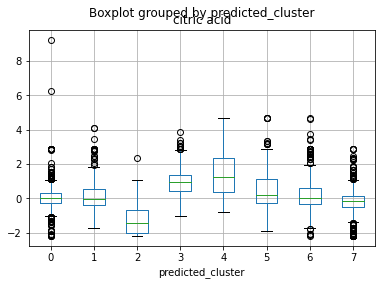

In [19]:
# Boxplot 1 looking at citric acid
Wine_Quality_Scaled.boxplot('citric acid',by='predicted_cluster')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


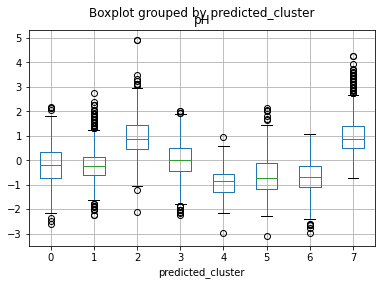

In [20]:
# Boxplot 2 looking at pH
Wine_Quality_Scaled.boxplot('pH',by='predicted_cluster')
plt.show()

2 - In a texbox describe the separation the clustering achieved for each of these features. Are the boxplots overlapping? Which two clusters are the most dissimilar based on these two features. Which are the most similar?

The separation in both the boxplots have similar trends even though they are different columns/variables. They definitely have separation between the clusters and these features but it's not very drastic or skewed. As far as overlapping goes it looks like there is some overlapping in both but more so boxplot two when looking at the pH column. The most dissimilar clusters based on these two features are 1 and 3. The most similar are 6 and 7. 

# Task 7

## Code Chunk 7 - PCA

In code chunk 7 we fit and transform the dataset by using PCA using 3 dimensions on our scaled dataframe. We save the results as a new dataframe and then sum up the explined variance and show the total. We then fit a KMeans object to our new reduced dataset and save it in a 'predicted_cluster' column. After doing that we then plot the principal component 1 and 2 using seaborn and highlight/hue the predicted cluster. To finish it off we use a text box to analyze what we observe and answer other questions.

In [21]:
# 1. Fit and transform using a PCA object using 3 dimensions on our scaled dataframe. Save the results in a new dataframe.
Wine_Quality_PCA = pd.DataFrame(data=Wine_Quality_Scaled)
pca = PCA(n_components=3, svd_solver='full')
pca.fit(Wine_Quality_PCA)
Wine_Quality_PCA

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_cluster
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,2
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,2
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,3
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,1
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,6
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,0


In [22]:
print(pca.explained_variance_ratio_)

[0.38260169 0.17180244 0.13853608]


2 - Explain how many dimensions we have reduced our dataset from.

We have reduced our dataset from 12 to 3 becuase we did 3 dimensions. We have 12 columns in our dataset not including our target variable and we selected 3 by doing 3 dimensions.

In [23]:
# 3. Sum up the explained variance and shwo the total.
sum(pca.explained_variance_ratio_)

0.692940212438832

3 - How much variance in our dataset do only 3 dimensions explain?

The sum of the variance in our dataset that only 3 dimensions explain is approximately 0.71 which would be 71%. This is expected because we have more than 3 dimensions in our data. If we were to use all of them in our data we would expect 1 or 100%.

In [24]:
# 4. Fit a KMeans object to our new reduced dataset
# 5. Predict the cluster using the new KMeans object and save it in a 'predicted_cluster' column
pca_three = PCA(3)
Wine_Quality_PCA_KM = pca_three.fit_transform(Wine_Quality_PCA.drop('predicted_cluster',axis=1))

Wine_Quality_PCA_KM = pd.DataFrame(Wine_Quality_PCA_KM)
Wine_Quality_PCA_KM.columns = ['PC' + x for x in list(map(str,list(range(0,3))))]

Wine_Quality_PCA_KM['predicted_cluster'] = KMeans(3).fit_predict(Wine_Quality_PCA_KM)
Wine_Quality_PCA_KM.head()

,PC0,PC1,PC2,predicted_cluster
0,-3.205996,0.416523,-2.722237,2
1,-3.039051,1.107462,-2.046952,2
2,-3.071893,0.878964,-1.742580,2
3,-1.571262,2.112545,2.592917,2
4,-3.205996,0.416523,-2.722237,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


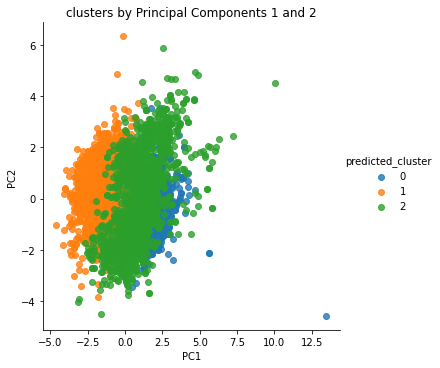

In [25]:
# 6. plot principal component 1 and 2 using seaborn and highlight/hue the predicted cluster
sns.lmplot("PC1", "PC2", data=Wine_Quality_PCA_KM, hue='predicted_cluster', fit_reg=False)
plt.title("clusters by Principal Components 1 and 2")
plt.show()

7 - In a text block explain if using PCA we have been more successful in visualizing the clusters than we were using our best model before applying PCA. Explain your argument well.

I personally would say that yes we have been more successful using PCA to visualize the clusters than we were using our best model before applying PCA. The reason being is becuase if you look at this scatter plot with our PCA the clusters are visually all there and for the most part vertically seperated with some overlapping. So the argument could go both ways because there still seems to be the same amount of overlapping but the separation and distinction of where the clusters are has improved. Overall I would say it was more successful but could for sure be improved upon.

# Task 8

## Code Chunk 8

In the code below we render the colab notebook to an HTML output file to submit the assignment. The output of the HTML file is named A9_Gardner_Tyler.html

In [28]:
# Render A9_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A9_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A9_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A9_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 577679 bytes to A9_Gardner_Tyler.html
